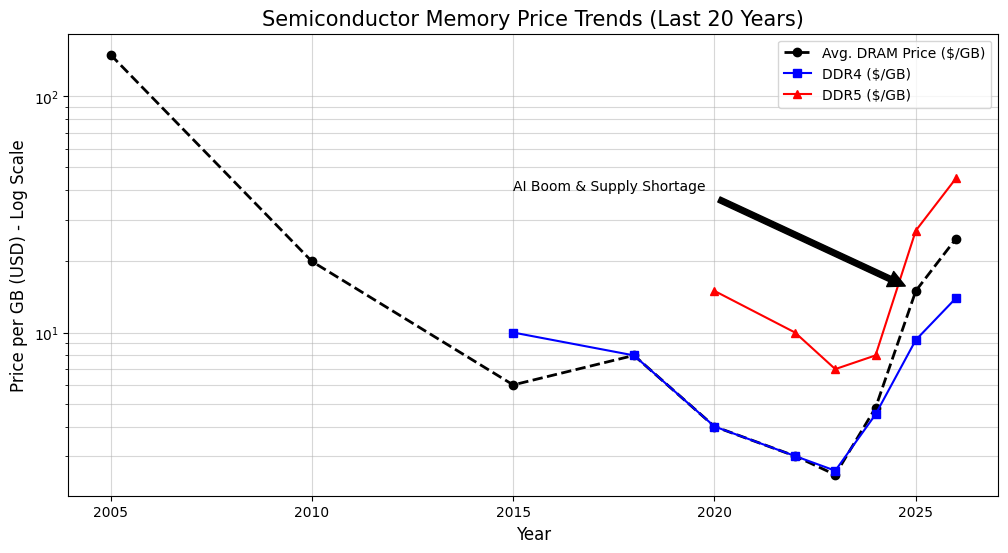

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. 역사적 데이터 및 최근 시장 동향을 반영한 데이터 생성 (단위: USD/GB)
data = {
    'Year': [2005, 2010, 2015, 2018, 2020, 2022, 2023, 2024, 2025, 2026],
    'DRAM_Price_Per_GB': [150, 20, 6, 8, 4, 3, 2.5, 4.8, 15, 25],  # 전체 평균 추세
    'DDR4_Price': [None, None, 10, 8, 4, 3, 2.6, 4.5, 9.3, 14],      # DDR4 특정 추이
    'DDR5_Price': [None, None, None, None, 15, 10, 7, 8, 27, 45]     # DDR5 특정 추이
}

df = pd.DataFrame(data)

# 2. 그래프 설정
plt.figure(figsize=(12, 6))
plt.yscale('log') # 가격 차이가 크므로 로그 스케일 권장

# 3. 데이터 플로팅
plt.plot(df['Year'], df['DRAM_Price_Per_GB'], marker='o', label='Avg. DRAM Price ($/GB)', color='black', linewidth=2, linestyle='--')
plt.plot(df['Year'], df['DDR4_Price'], marker='s', label='DDR4 ($/GB)', color='blue')
plt.plot(df['Year'], df['DDR5_Price'], marker='^', label='DDR5 ($/GB)', color='red')

# 4. 그래프 꾸미기
plt.title('Semiconductor Memory Price Trends (Last 20 Years)', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price per GB (USD) - Log Scale', fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.legend()

# 주요 사건 메모
plt.annotate('AI Boom & Supply Shortage', xy=(2025, 15), xytext=(2015, 40),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

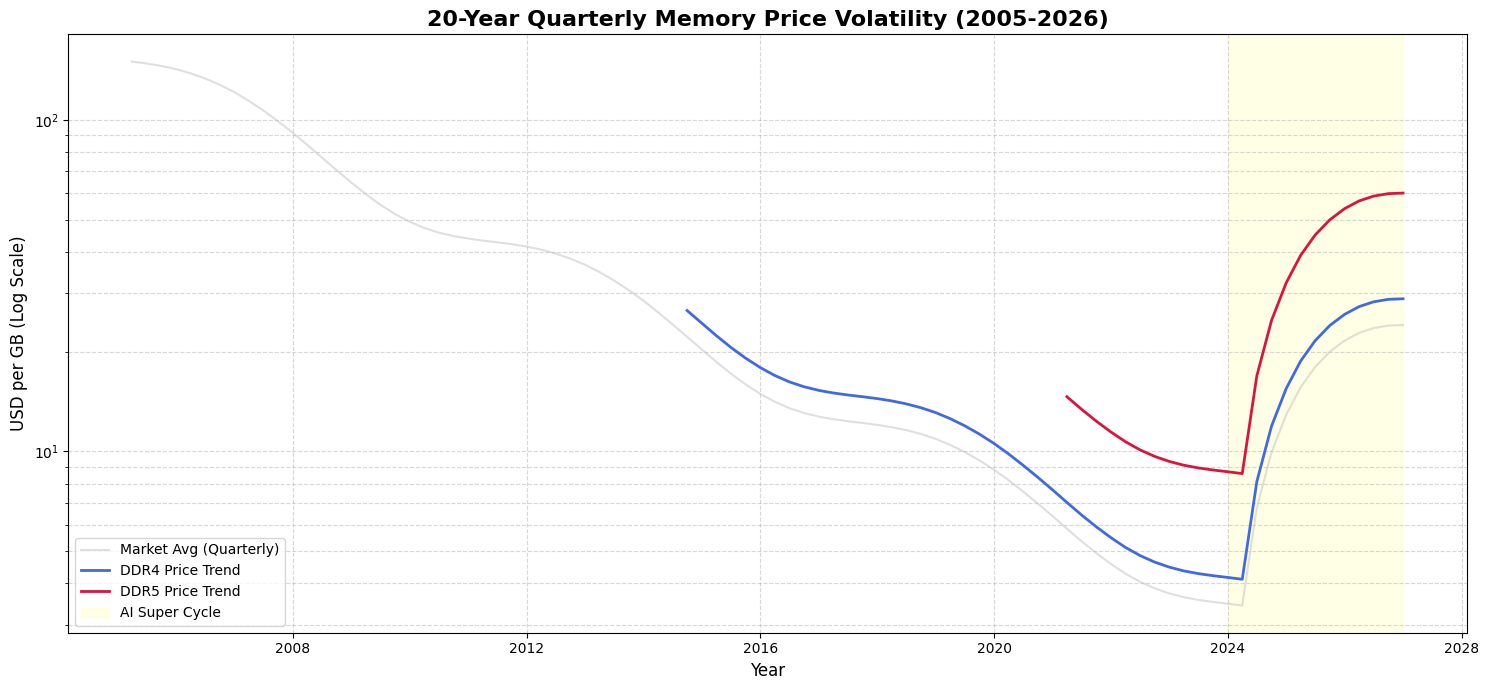

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. 분기별 타임라인 생성 (2005 Q1 ~ 2026 Q4)
dates = pd.date_range(start='2005-01-01', end='2026-12-31', freq='QE')
df = pd.DataFrame({'Date': dates})

# 2. 가격 모델링 (지수적 하락 + 사이클 노이즈 + 최근 급등 반영)
def generate_price(t, start_price, decay_rate):
    # 기본 하락 곡선 + 경기 사이클(Sine파) + 랜덤 노이즈
    base = start_price * np.exp(-decay_rate * t)
    cycle = 1 + 0.15 * np.sin(t / 4) # 1년 주기의 미세 변동
    return base * cycle

t = np.arange(len(df))
# 2005년 $150에서 시작하여 점차 하락하는 기본 DRAM 가격
df['Avg_DRAM_Price'] = generate_price(t, 150, 0.05)

# 3. 최근 AI 슈퍼사이클 보정 (2024년 이후 가격 급등 시뮬레이션)
# 2024년(약 76번째 데이터)부터 가격이 다시 상승하는 로직 추가
ai_boom_start = 76 
df.loc[ai_boom_start:, 'Avg_DRAM_Price'] *= np.linspace(1, 12, len(df)-ai_boom_start)

# 4. DDR4, DDR5 특정 시점 데이터 (출시 시점 기준)
df['DDR4'] = df['Avg_DRAM_Price'].where(df['Date'] >= '2014-09-01') * 1.2
df['DDR5'] = df['Avg_DRAM_Price'].where(df['Date'] >= '2021-01-01') * 2.5

# 5. 시각화
plt.figure(figsize=(15, 7))
plt.yscale('log')

plt.plot(df['Date'], df['Avg_DRAM_Price'], color='silver', alpha=0.5, label='Market Avg (Quarterly)')
plt.plot(df['Date'], df['DDR4'], color='royalblue', linewidth=2, label='DDR4 Price Trend')
plt.plot(df['Date'], df['DDR5'], color='crimson', linewidth=2, label='DDR5 Price Trend')

# 주요 구간 강조
plt.axvspan(pd.Timestamp('2024-01-01'), pd.Timestamp('2026-12-31'), color='yellow', alpha=0.1, label='AI Super Cycle')

plt.title('20-Year Quarterly Memory Price Volatility (2005-2026)', fontsize=16, fontweight='bold')
plt.ylabel('USD per GB (Log Scale)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

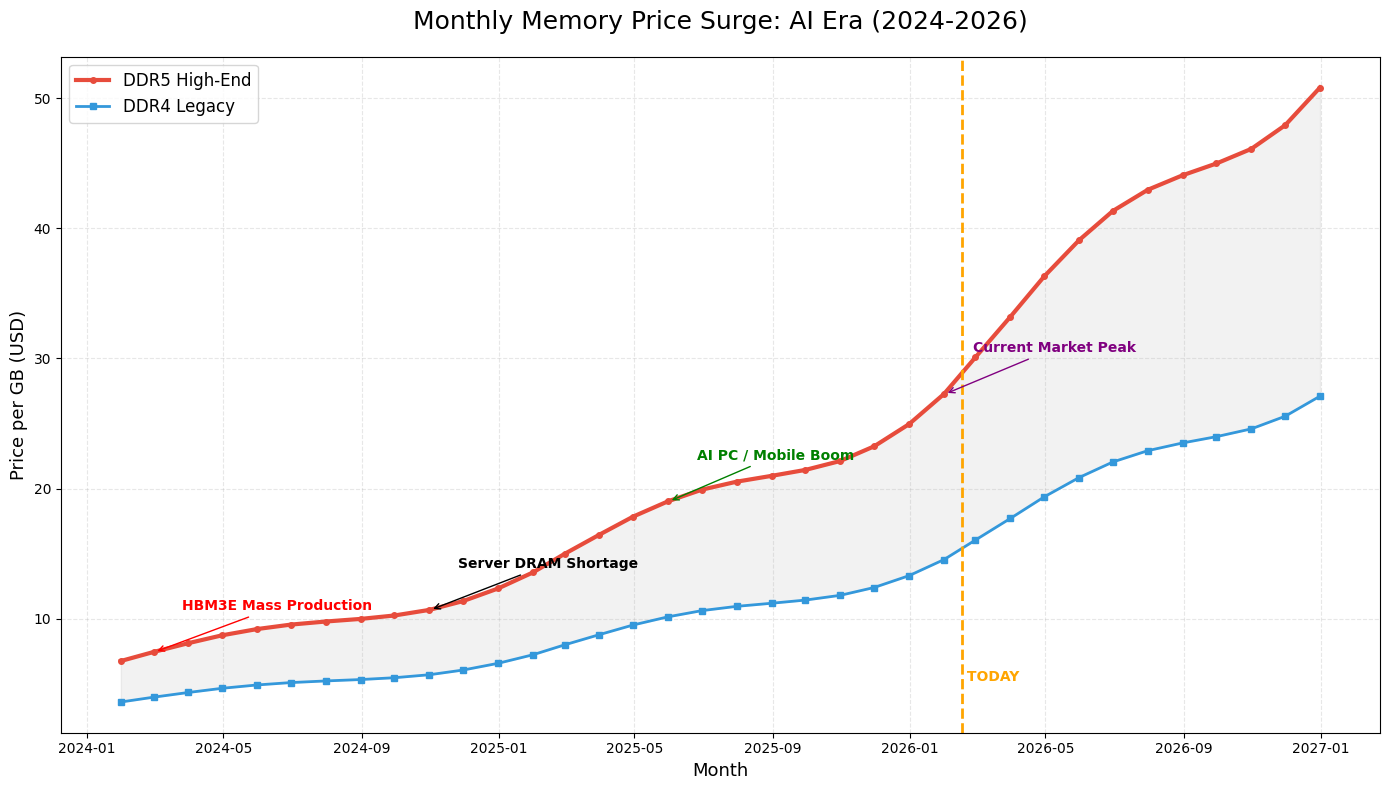

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. 월 단위 타임라인 생성 (2024년 1월 ~ 2026년 12월)
dates = pd.date_range(start='2024-01-01', end='2026-12-31', freq='ME')
df_recent = pd.DataFrame({'Date': dates})

# 2. 월별 가격 변동 모델링 (실제 시장 트렌드 반영)
# 2024년 초 $4 수준에서 시작하여 2026년 말 $40 이상으로 치솟는 시나리오
t = np.arange(len(df_recent))
base_price = 4.5 * np.exp(0.06 * t) # 지수적 상승 곡선
volatility = 1 + 0.08 * np.sin(t / 2) # 월별 수급 불균형에 따른 파동
df_recent['DRAM_Price'] = base_price * volatility

# DDR4와 DDR5의 가격 차별화 (DDR5의 더 가파른 상승폭)
df_recent['DDR4'] = df_recent['DRAM_Price'] * 0.8
df_recent['DDR5'] = df_recent['DRAM_Price'] * 1.5

# 3. 시각화 설정
plt.figure(figsize=(14, 8))

# 그래프 그리기
plt.plot(df_recent['Date'], df_recent['DDR5'], color='#E74C3C', marker='o', markersize=4, linewidth=3, label='DDR5 High-End')
plt.plot(df_recent['Date'], df_recent['DDR4'], color='#3498DB', marker='s', markersize=4, linewidth=2, label='DDR4 Legacy')
plt.fill_between(df_recent['Date'], df_recent['DDR4'], df_recent['DDR5'], color='gray', alpha=0.1)

# 4. 주요 시장 이벤트 주석 (Annotation)
events = [
    ('2024-03-01', 'HBM3E Mass Production', 'red'),
    ('2024-11-01', 'Server DRAM Shortage', 'black'),
    ('2025-06-01', 'AI PC / Mobile Boom', 'green'),
    ('2026-02-01', 'Current Market Peak', 'purple')
]

for date_str, label, color in events:
    event_date = pd.to_datetime(date_str)
    # 해당 날짜와 가장 가까운 가격 데이터 찾기
    y_val = df_recent.loc[df_recent['Date'] <= event_date, 'DDR5'].iloc[-1]
    plt.annotate(label, xy=(event_date, y_val), xytext=(20, 30),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', color=color),
                 fontsize=10, fontweight='bold', color=color)

# 5. 그래프 꾸미기
plt.title('Monthly Memory Price Surge: AI Era (2024-2026)', fontsize=18, pad=20)
plt.ylabel('Price per GB (USD)', fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.legend(loc='upper left', fontsize=12)

# 현재 시점(2026년 2월) 표시
plt.axvline(pd.Timestamp('2026-02-16'), color='orange', linestyle='--', linewidth=2)
plt.text(pd.Timestamp('2026-02-16'), 5, ' TODAY', color='orange', fontweight='bold', verticalalignment='bottom')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

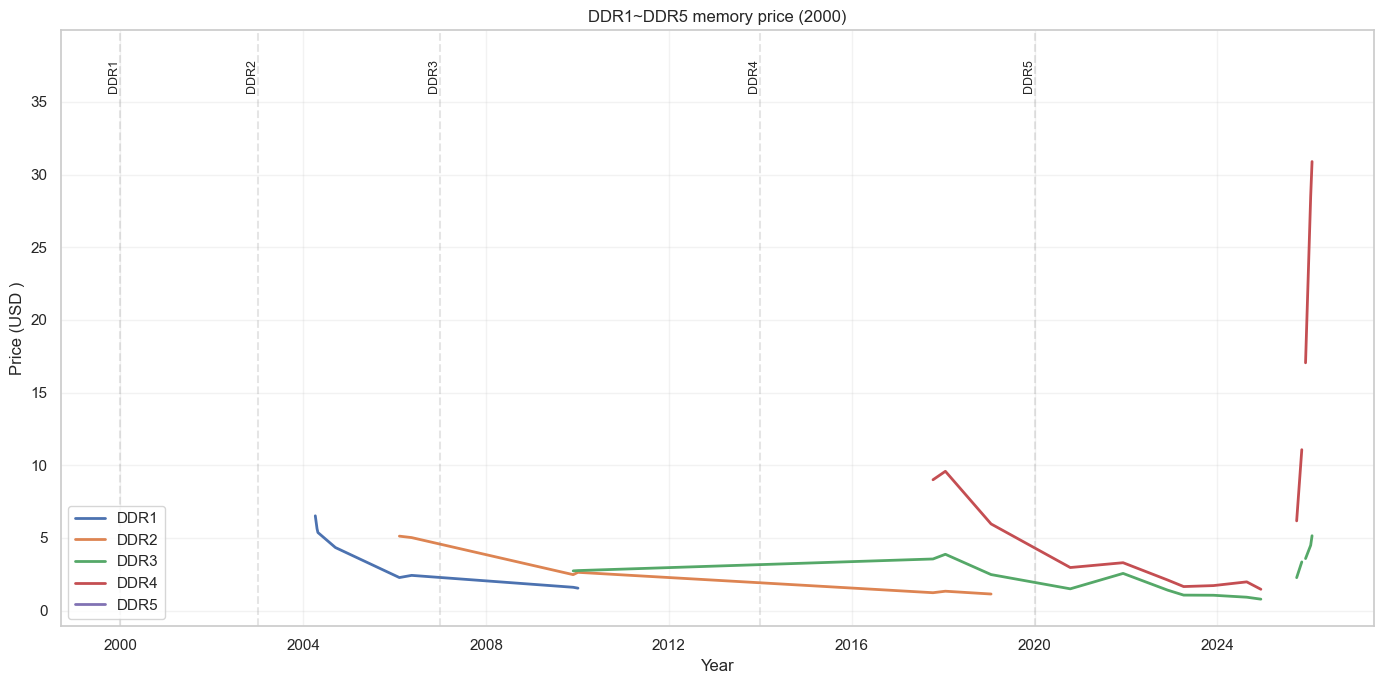

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  # ----------------------------
  # 1) CSV 파일 읽기
  # ----------------------------
  # CSV 예시 컬럼:
  # date,DDR1,DDR2,DDR3,DDR4,DDR5
  # 2000-01,6.5,,,,
  # 2003-01,5.1,7.8,,,
  # ...
csv_path = "ddr_prices_2000_2026.csv"
df = pd.read_csv(csv_path)

# 날짜 처리
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

# ----------------------------
# 2) 그래프 그리기
# ----------------------------

# 그래프 그리기 설정 (한글 깨짐 방지 설정이 필요할 수 있습니다)
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))

for col in ["DDR1", "DDR2", "DDR3", "DDR4", "DDR5"]:
    if col in df.columns:
        plt.plot(df["date"], df[col], linewidth=2, label=col)

# 세대 전환 시점(참고용, 필요시 수정)
launch_years = {
    "DDR1": "2000-01-01",
    "DDR2": "2003-01-01",
    "DDR3": "2007-01-01",
    "DDR4": "2014-01-01",
    "DDR5": "2020-01-01",
}
for gen, dt in launch_years.items():
    x = pd.to_datetime(dt)
    plt.axvline(x=x, linestyle="--", alpha=0.2, color="gray")
    plt.text(x, plt.ylim()[1] * 0.95, gen, rotation=90, va="top", ha="right", fontsize=9)

plt.title("DDR1~DDR5 memory price (2000)")
plt.xlabel("Year")
plt.ylabel("Price (USD )")
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

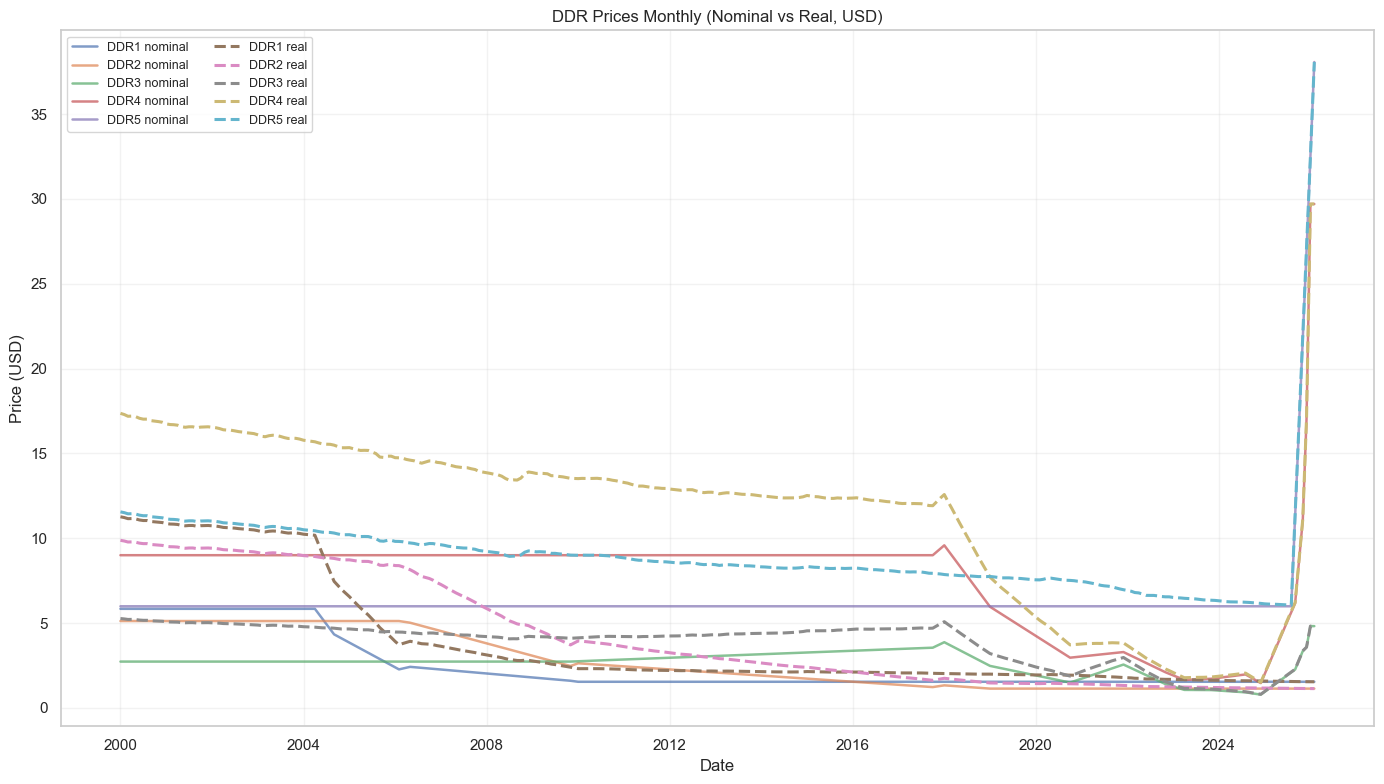

[OK] Wrote: ddr_prices_2000_2026_monthly_real.csv
[OK] Wrote plot: ddr_prices_2000_2026_monthly_real.png


In [12]:
#!/usr/bin/env python3
"""
DDR price pipeline:
1) Load wide-format DDR price CSV (date, DDR1..DDR5)
2) Resample to monthly frequency
3) Convert currency using public FX API (Frankfurter/ECB)
4) Inflation-adjust using public CPI series (FRED CPIAUCSL)
5) Save processed CSV (+ optional plot)
"""

from __future__ import annotations

import argparse
import io
from pathlib import Path
from typing import Dict

import matplotlib.pyplot as plt
import pandas as pd
import requests

FRED_CPI_URL = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL"


def parse_args() -> argparse.Namespace:
    parser = argparse.ArgumentParser(
        description="Monthly resampling + FX conversion + inflation adjustment for DDR prices"
    )
    parser.add_argument(
        "--input",
        default="ddr_prices_2000_2026.csv",
        help="Input CSV path (wide format: date,DDR1,DDR2,DDR3,DDR4,DDR5)",
    )
    parser.add_argument(
        "--output",
        default="ddr_prices_2000_2026_monthly_real.csv",
        help="Output CSV path",
    )
    parser.add_argument(
        "--source-currency",
        default="USD",
        help="Currency of source price columns (default: USD)",
    )
    parser.add_argument(
        "--target-currency",
        default="USD",
        help="Currency for output prices (default: USD)",
    )
    parser.add_argument(
        "--base-month",
        default="latest",
        help="Inflation base month (YYYY-MM) or 'latest' (default)",
    )
    parser.add_argument(
        "--resample-method",
        choices=["linear", "time", "ffill"],
        default="time",
        help="Interpolation method after monthly resampling",
    )
    parser.add_argument(
        "--disable-inflation-adjustment",
        action="store_true",
        help="Skip CPI inflation adjustment",
    )
    parser.add_argument(
        "--plot-path",
        default="ddr_prices_2000_2026_monthly_real.png",
        help="Optional plot output path; set empty string to skip",
    )
    parser.add_argument(
        "--timeout-sec",
        type=int,
        default=20,
        help="HTTP timeout seconds",
    )
    # Jupyter/IPython injects extra args like "--f=...".
    # Use parse_known_args so notebook execution does not fail.
    args, _unknown = parser.parse_known_args()
    return args


def load_wide_ddr_csv(path: Path) -> pd.DataFrame:
    df = pd.read_csv(path)
    if "date" not in df.columns:
        raise ValueError("Input CSV must contain 'date' column.")

    ddr_cols = [c for c in df.columns if c.upper().startswith("DDR")]
    if not ddr_cols:
        raise ValueError("Input CSV must include DDR columns like DDR1..DDR5.")

    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df = df.dropna(subset=["date"]).sort_values("date")

    for col in ddr_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    return df[["date"] + ddr_cols]


def resample_monthly(df: pd.DataFrame, method: str) -> pd.DataFrame:
    monthly = df.set_index("date").resample("MS").mean()
    if method == "ffill":
        monthly = monthly.ffill()
    else:
        monthly = monthly.interpolate(method=method, limit_direction="both")
    return monthly


def fetch_fx_monthly(
    source_currency: str,
    target_currency: str,
    start_date: pd.Timestamp,
    end_date: pd.Timestamp,
    timeout_sec: int,
) -> pd.Series:
    source_currency = source_currency.upper()
    target_currency = target_currency.upper()

    if source_currency == target_currency:
        idx = pd.date_range(start=start_date, end=end_date, freq="MS")
        return pd.Series(1.0, index=idx, name="fx_rate")

    start_str = start_date.strftime("%Y-%m-%d")
    end_str = end_date.strftime("%Y-%m-%d")
    url = (
        f"https://api.frankfurter.app/{start_str}..{end_str}"
        f"?from={source_currency}&to={target_currency}"
    )
    resp = requests.get(url, timeout=timeout_sec)
    resp.raise_for_status()
    payload = resp.json()

    rates: Dict[str, Dict[str, float]] = payload.get("rates", {})
    if not rates:
        raise RuntimeError("FX API returned no rates.")

    fx_daily = pd.Series(
        {pd.to_datetime(day): vals.get(target_currency) for day, vals in rates.items()},
        name="fx_rate",
    ).sort_index()

    fx_monthly = fx_daily.resample("MS").mean().interpolate("time").ffill().bfill()
    return fx_monthly


def fetch_cpi_us_monthly(timeout_sec: int) -> pd.Series:
    resp = requests.get(FRED_CPI_URL, timeout=timeout_sec)
    resp.raise_for_status()

    cpi_df = pd.read_csv(io.StringIO(resp.text))
    cpi_df.columns = [c.strip() for c in cpi_df.columns]

    # FRED date column can be "DATE" or "observation_date" depending on endpoint/version.
    date_col = None
    for candidate in ("DATE", "observation_date"):
        if candidate in cpi_df.columns:
            date_col = candidate
            break

    if date_col is None or "CPIAUCSL" not in cpi_df.columns:
        preview = ", ".join(map(str, cpi_df.columns[:5]))
        raise RuntimeError(
            f"Unexpected CPI data format from FRED. Columns found: {preview}"
        )

    cpi_df[date_col] = pd.to_datetime(cpi_df[date_col], errors="coerce")
    cpi_df["CPIAUCSL"] = pd.to_numeric(cpi_df["CPIAUCSL"], errors="coerce")
    cpi_df = cpi_df.dropna(subset=[date_col, "CPIAUCSL"]).set_index(date_col).sort_index()
    return cpi_df["CPIAUCSL"]


def inflation_adjust(
    price_df: pd.DataFrame,
    cpi_series: pd.Series,
    base_month: str,
) -> pd.DataFrame:
    cpi_aligned = cpi_series.reindex(price_df.index).interpolate("time").ffill().bfill()

    if base_month == "latest":
        base_cpi = cpi_aligned.dropna().iloc[-1]
    else:
        base_idx = pd.to_datetime(f"{base_month}-01")
        if base_idx not in cpi_aligned.index:
            # Use nearest month if exact month is missing.
            nearest_loc = cpi_aligned.index.get_indexer([base_idx], method="nearest")[0]
            base_cpi = cpi_aligned.iloc[nearest_loc]
        else:
            base_cpi = cpi_aligned.loc[base_idx]

    factor = base_cpi / cpi_aligned
    adjusted = price_df.multiply(factor, axis=0)
    return adjusted


def build_output(
    monthly_prices: pd.DataFrame,
    fx_monthly: pd.Series,
    inflation_adjusted: pd.DataFrame | None,
    source_currency: str,
    target_currency: str,
) -> pd.DataFrame:
    fx_monthly = fx_monthly.reindex(monthly_prices.index).interpolate("time").ffill().bfill()
    nominal_target = monthly_prices.multiply(fx_monthly, axis=0)

    out = pd.DataFrame(index=monthly_prices.index)
    out["fx_rate"] = fx_monthly
    for col in monthly_prices.columns:
        out[f"{col}_nominal_{source_currency.upper()}"] = monthly_prices[col]
        out[f"{col}_nominal_{target_currency.upper()}"] = nominal_target[col]
        if inflation_adjusted is not None:
            out[f"{col}_real_{target_currency.upper()}"] = inflation_adjusted[col]

    out = out.reset_index().rename(columns={"index": "date"})
    return out


def make_plot(df_out: pd.DataFrame, target_currency: str, plot_path: Path) -> None:
    real_cols = [c for c in df_out.columns if c.endswith(f"_real_{target_currency.upper()}")]
    nominal_cols = [c for c in df_out.columns if c.endswith(f"_nominal_{target_currency.upper()}")]

    if not nominal_cols:
        return

    plt.figure(figsize=(14, 8))
    x = pd.to_datetime(df_out["date"])

    for col in nominal_cols:
        label = col.replace(f"_nominal_{target_currency.upper()}", "")
        plt.plot(x, df_out[col], linewidth=1.8, alpha=0.7, label=f"{label} nominal")

    for col in real_cols:
        label = col.replace(f"_real_{target_currency.upper()}", "")
        plt.plot(x, df_out[col], linewidth=2.2, linestyle="--", label=f"{label} real")

    plt.title(f"DDR Prices Monthly (Nominal vs Real, {target_currency.upper()})")
    plt.xlabel("Date")
    plt.ylabel(f"Price ({target_currency.upper()})")
    plt.grid(alpha=0.25)
    plt.legend(ncol=2, fontsize=9)
    plt.tight_layout()
    plt.savefig(plot_path, dpi=150)
    plt.show()
    plt.close()


def main() -> None:
    args = parse_args()
    input_path = Path(args.input)
    output_path = Path(args.output)

    raw = load_wide_ddr_csv(input_path)
    monthly = resample_monthly(raw, method=args.resample_method)

    fx = fetch_fx_monthly(
        source_currency=args.source_currency,
        target_currency=args.target_currency,
        start_date=monthly.index.min(),
        end_date=monthly.index.max(),
        timeout_sec=args.timeout_sec,
    )

    nominal_target = monthly.multiply(
        fx.reindex(monthly.index).interpolate("time").ffill().bfill(), axis=0
    )

    inflation_adjusted = None
    if not args.disable_inflation_adjustment:
        cpi = fetch_cpi_us_monthly(timeout_sec=args.timeout_sec)
        inflation_adjusted = inflation_adjust(
            nominal_target,
            cpi,
            base_month=args.base_month,
        )

    out = build_output(
        monthly_prices=monthly,
        fx_monthly=fx,
        inflation_adjusted=inflation_adjusted,
        source_currency=args.source_currency,
        target_currency=args.target_currency,
    )
    out.to_csv(output_path, index=False, encoding="utf-8")

    if args.plot_path:
        make_plot(out, args.target_currency, Path(args.plot_path))

    print(f"[OK] Wrote: {output_path}")
    if args.plot_path:
        print(f"[OK] Wrote plot: {args.plot_path}")


if __name__ == "__main__":
    main()


